In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten, Activation

img_height, img_width = 224, 224
batch_size = 16
nb_train_samples = 7039
nb_validation_samples = 1508
nb_test_samples = 1508

from keras.preprocessing.image import ImageDataGenerator
import os

data_entrenamiento = "C:/Users/Felipe/dataset-final/train"
data_validacion = "C:/Users/Felipe/dataset-final/val"
data_test = "C:/Users/Felipe/dataset-final/test"


#Preparación de las imágenes

entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)


entrenamiento_generador = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validacion_generador = test_datagen.flow_from_directory(
    data_validacion,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Using TensorFlow backend.


Found 7037 images belonging to 2 classes.
Found 1508 images belonging to 2 classes.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "C:/Users/Felipe/dataset-final/test"
CATEGORIES = ["linear", "nonlinear"]
IMG_SIZE = 224

testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass

create_testing_data()

In [3]:
import random

random.shuffle(testing_data)

X = []
y = []

for features, label in testing_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

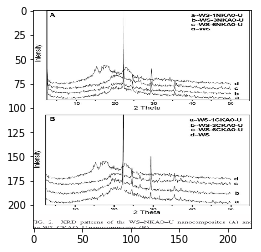

0


In [4]:
#1 es no linear
i=6
plt.imshow(X[i])  # graph it
plt.show()  # display!
print(y[i])

In [5]:
import tensorflow as tf 
model = tf.keras.models.load_model('C:/Users/Felipe/Downloads/descarga.gz~/best-models/MM-1-conv-512-nodes-0-dense-4e-06-learning-best.h5')

In [6]:
X = X/255.0
predictions = model.predict(X)

In [21]:
for i in predictions[:15]:
    print(i)

[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]


In [8]:
predictions = np.round(predictions)
predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [25]:
y[:15]

[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]

In [10]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_batches = test_datagen.flow_from_directory(
    data_test,
    target_size=(img_height, img_width),
    classes=['linear','nonlinear'],
    seed = 1,
    batch_size=batch_size)

predictions2 = model.predict_generator(test_batches,steps = nb_test_samples/batch_size,verbose=0)
predictions2

Found 1508 images belonging to 2 classes.


array([[0.2680756 ],
       [0.27763402],
       [0.63597953],
       ...,
       [0.6903348 ],
       [0.2606622 ],
       [0.6032647 ]], dtype=float32)

In [24]:
for i in predictions2[:15]:
    print(i)

[0.2680756]
[0.27763402]
[0.63597953]
[0.18408465]
[0.6593016]
[0.6070994]
[0.56418407]
[0.15312958]
[0.41268983]
[0.66605103]
[0.4127476]
[0.48995227]
[0.46843717]
[0.5515892]
[0.7862402]


In [12]:
y_np = np.array(y)

from sklearn.metrics import confusion_matrix, classification_report 

cm_2 = confusion_matrix(y_np, np.round(predictions[:,0]))
print(cm_2)

[[372 217]
 [130 763]]


In [13]:
cm_report = classification_report(y_np, np.round(predictions[:,0]))
print(cm_report)

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       589
           1       0.78      0.85      0.81       893

   micro avg       0.77      0.77      0.77      1482
   macro avg       0.76      0.74      0.75      1482
weighted avg       0.76      0.77      0.76      1482



In [14]:
type(cm_report)

str

In [15]:
model.evaluate(X,y_np)

1482/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.8874511261861495, 0.7658569]

In [16]:
test_batches_2 = test_datagen.flow_from_directory(
    data_test,
    target_size=(img_height, img_width),
    class_mode='binary',
    seed = 1,
    batch_size=batch_size)

loss, acc = model.evaluate_generator(test_batches_2, 
                                     steps=nb_test_samples//batch_size, 
                                     verbose=0)
print(loss)
print(acc)

Found 1508 images belonging to 2 classes.
3.7593689294571573
0.77792555


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dropout (Dropout)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [18]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L1L2',
     'config': {'l1': 0.009999999776482582, 'l2': 0.009999999776482582}},
    'bias_regularizer': None,
    'activity_regularizer': {'class_name': 'L1L2',
     'config': {'l1': 0.0, 'l2': 0.009999999776482582}},
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d',
    'trainable': True,
    'dtype': 'float32',
    'pool_size'